In [1]:
# Make a plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(16,8)})
sns.set_theme(style="whitegrid")
'''
Set some plot parameters
'''
newRCparams = {
    'font.weight': 'bold',
    'axes.titlesize':'xx-large',
    'axes.titleweight':'bold',
    'axes.labelsize':'large',
    'axes.labelweight':'bold',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'legend.title_fontsize': 'large',
    'legend.fontsize':'large',
    'legend.markerscale':2,
    'mathtext.default': 'bf'
    }
plt.rcParams.update(newRCparams)
palette = sns.color_palette(n_colors=6)

In [2]:
# Load data
df1 = pd.read_csv('reliabilities.csv')
df2 = pd.read_csv('modelCorrs.csv')
df3 = pd.read_excel('subj_sessDays.xlsx')
df4 = pd.read_csv('icc2_values.csv')
df5 = pd.read_excel('noiseCeilings.xlsx')
rdms = pd.read_csv('icc6_rdms.csv')
# Combine df2 and df3
df2['time'] = 0
for idx in range(len(df2)):
    if df2.idx[idx] in [101,102,103,104,105,106]:
        subj    = df2.subj[idx]
        session = df2.session[idx]
        df2.iloc[idx,-1] = df3[np.logical_and(df3.subj == subj, df3.ses == session)].time.item()

Text(0.5, 1.0, 'Reliability as a function of Stimulus Presentations and Participants')

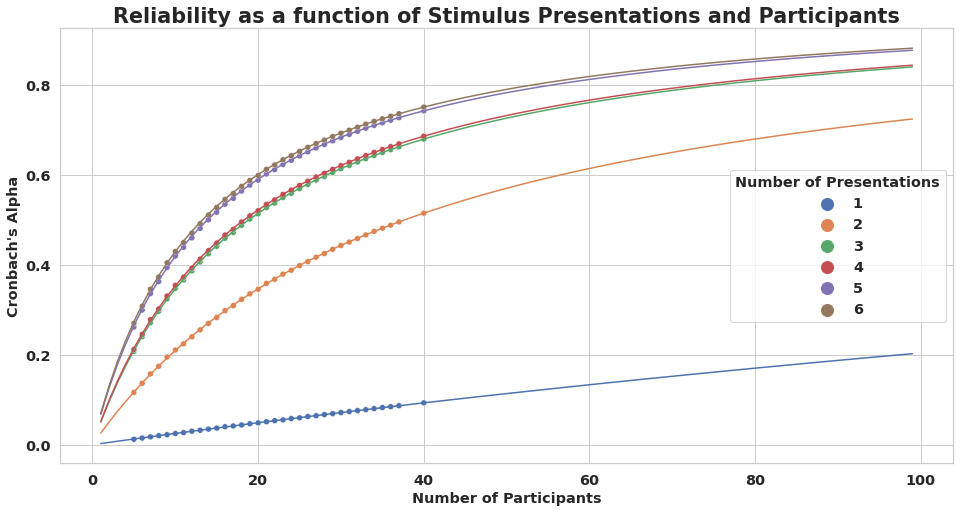

In [3]:
'''
### Figure 1 ###

This code applies the Spearman-Brown Prophecy formula (sbp) 
to the ICC2 values that were calculated and saved in df4
'''
def sbp(n,r):
    out = (n*r) / (1 + (n-1)*r)
    return out
x = np.arange(1,100)
preds = [[sbp(n,df4.ICC2_values[k]) for n in x] for k in range(6)]
ax1 = sns.scatterplot(x='numSubj',y='crona',hue='numStim',
                data=df1[df1.numStim.isin([1,2,3,4,5,6])].groupby(['numStim','numSubj']).mean().reset_index(),
                palette=palette, legend='auto')
sns.lineplot(x=x,y=preds[0],color=palette[0]); sns.lineplot(x=x,y=preds[1],color=palette[1])
sns.lineplot(x=x,y=preds[2],color=palette[2]); sns.lineplot(x=x,y=preds[3],color=palette[3])
sns.lineplot(x=x,y=preds[4],color=palette[4]); sns.lineplot(x=x,y=preds[5],color=palette[5])
plt.legend(title='Number of Presentations')
plt.xlabel('Number of Participants'); plt.ylabel("Cronbach's Alpha")
plt.title('Reliability as a function of Stimulus Presentations and Participants')
#plt.savefig('ExtendedCronbach_differentPres.png', dpi=300, bbog_inches='tight')

Text(0.5, 1.0, 'Presentation order and Correlation with Model')

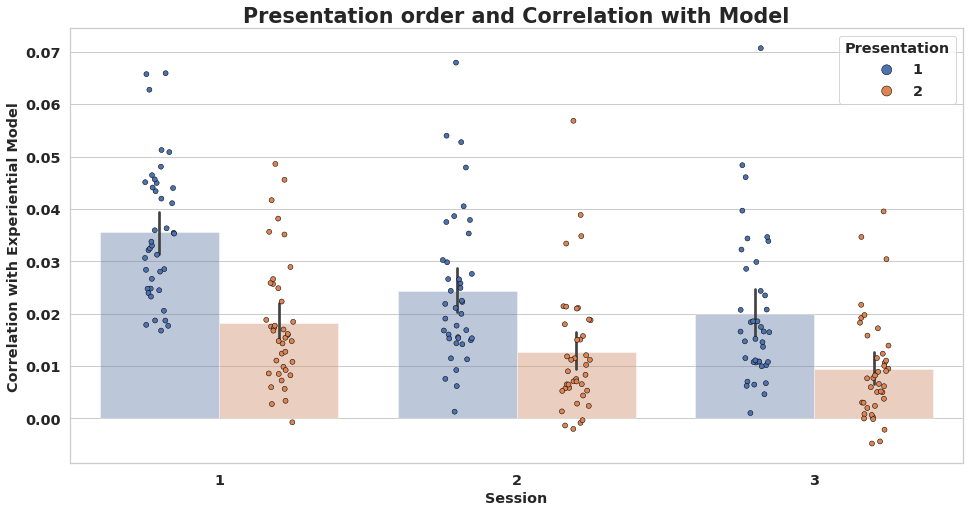

In [4]:
'''
### Figure 2 ###

Demonstrates the effect of session and order within session. 
The first set of commands generates the figure for CREA, the second
for Word2Vec
'''
tmp = df2[df2.idx.isin([101,102,103,104,105,106])].copy()
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = sns.barplot(x='session',y='corr',hue='pres',data=tmp,alpha=.4)
ax2 = sns.stripplot(x='session',y='corr',hue='pres',data=tmp,
              dodge=True,edgecolor='black',linewidth=.5)
plt.legend(ax.collections[:-2:],['1','2'],title='Presentation')
plt.xlabel('Session'); plt.ylabel('Correlation with Experiential Model')
plt.title('Presentation order and Correlation with Model')
#plt.savefig('singlePres.png',dpi=300,bbox_inches='tight')

Text(0.5, 1.0, 'Presentation order and Correlation with Model')

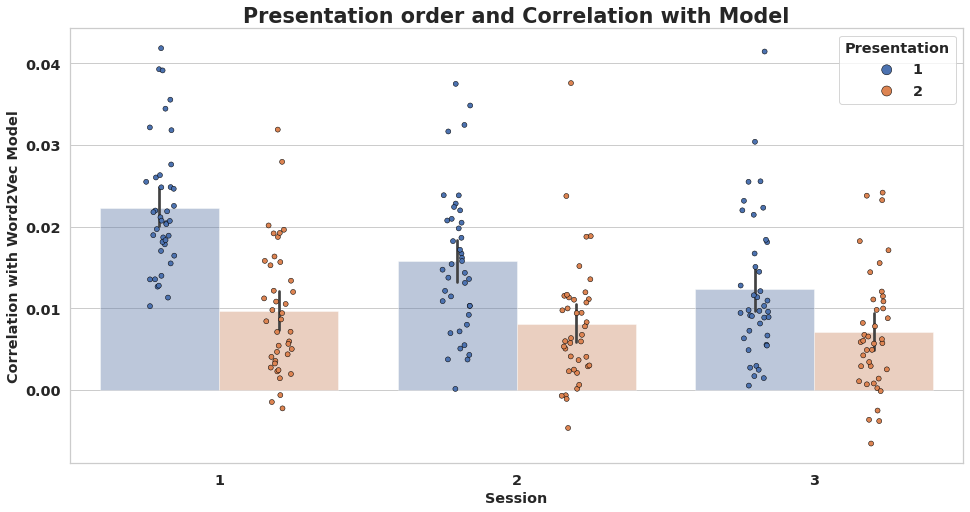

In [5]:
#) W2V supplemental version of Plot
tmp = df2[df2.idx.isin([101,102,103,104,105,106])].copy()
sns.barplot(x='session',y='corrw2v',hue='pres',data=tmp,alpha=.4)
sns.stripplot(x='session',y='corrw2v',hue='pres',data=tmp,
              dodge=True,edgecolor='black',linewidth=.5)
plt.legend(ax.collections[:-2:],['1','2'],title='Presentation')
plt.xlabel('Session'); plt.ylabel('Correlation with Word2Vec Model')
plt.title('Presentation order and Correlation with Model')
#plt.savefig('singlePres_w2v.png',dpi=300,bbox_inches='tight')

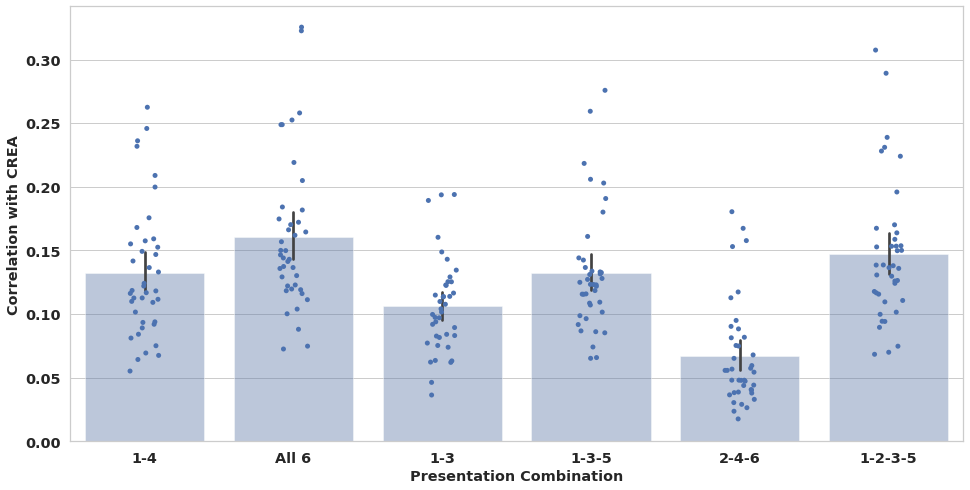

In [6]:
'''
### Figure 3 ###

The correlations for different presentation combinations
It also generates the w2v supplemental figure
'''
tmp = df2;
# Figure 3
sns.barplot(x='idx',y='corr',color=palette[0], data=tmp[tmp.idx.isin([13,135,246,1235,6,4])],alpha=.4)
sns.stripplot(x='idx',y='corr',color=palette[0], data=tmp[tmp.idx.isin([13,135,246,1235,6,4])])
plt.xticks(ticks=[0,1,2,3,4,5],labels=['1-4','All 6','1-3','1-3-5','2-4-6','1-2-3-5']);
plt.xlabel('Presentation Combination'); plt.ylabel('Correlation with CREA');
#plt.savefig('corrCrea_combination.png',dpi=300,bbox_inches='tight')

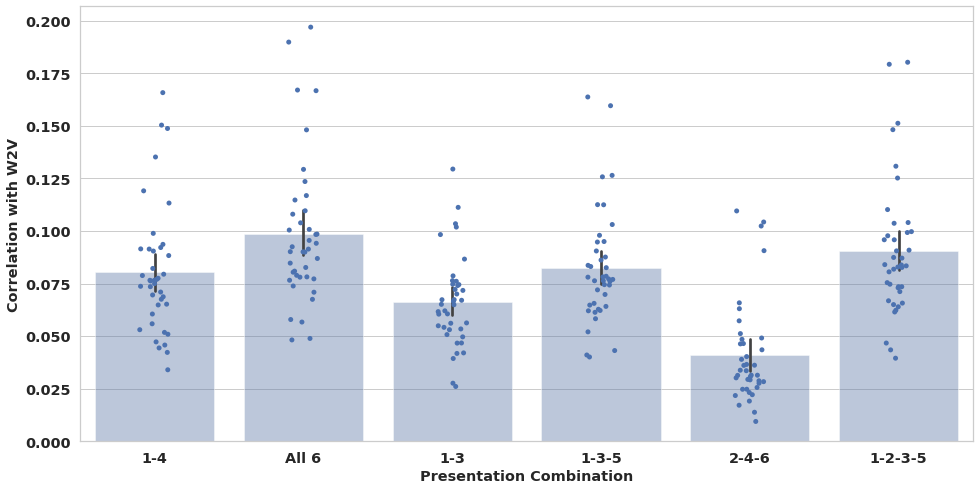

In [7]:
# W2V Supplemental Figure
sns.barplot(x='idx',y='corrw2v',color=palette[0], data=tmp[tmp.idx.isin([13,135,246,1235,6,4])],alpha=.4)
sns.stripplot(x='idx',y='corrw2v',color=palette[0], data=tmp[tmp.idx.isin([13,135,246,1235,6,4])])
plt.xticks(ticks=[0,1,2,3,4,5],labels=['1-4','All 6','1-3','1-3-5','2-4-6','1-2-3-5']);
plt.xlabel('Presentation Combination'); plt.ylabel('Correlation with W2V');
#plt.savefig('corrW2V_combination.png',dpi=300,bbox_inches='tight')

Text(0.5, 1.0, 'Reliability with Different Combinations')

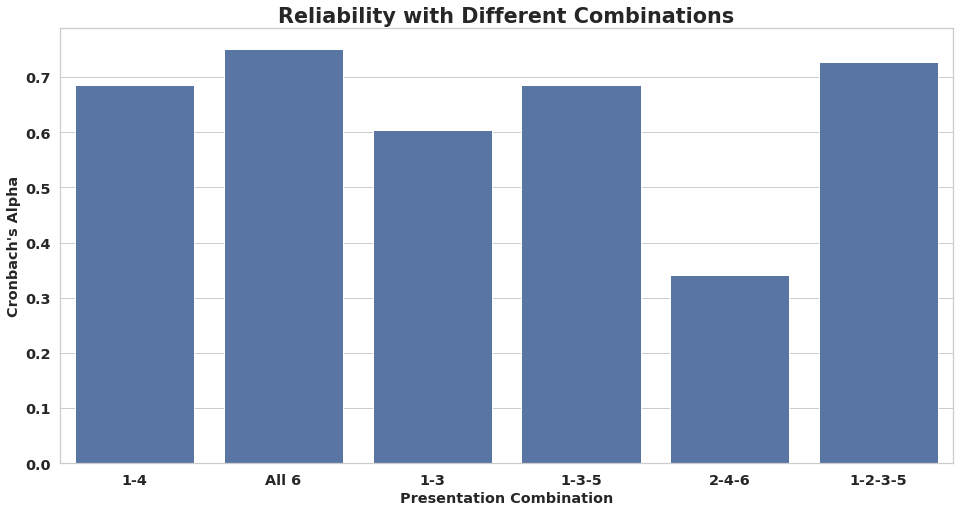

In [8]:
# Reliability supplementary figure
tmp = df1[np.logical_and(df1.numStim.isin([13,135,246,1235,6,4]),df1.numSubj==40)]
sns.barplot(x='numStim',y='crona',color=palette[0], data=tmp)
plt.xticks(ticks=[0,1,2,3,4,5],labels=['1-4','All 6','1-3','1-3-5','2-4-6','1-2-3-5']);
plt.xlabel('Presentation Combination'); plt.ylabel("Cronbach's Alpha");
plt.title('Reliability with Different Combinations')
#plt.savefig('reliability_combination.png',dpi=300,bbox_inches='tight')

Text(0.5, 1.0, 'Correlation Between Mean RSA Values and Reliability')

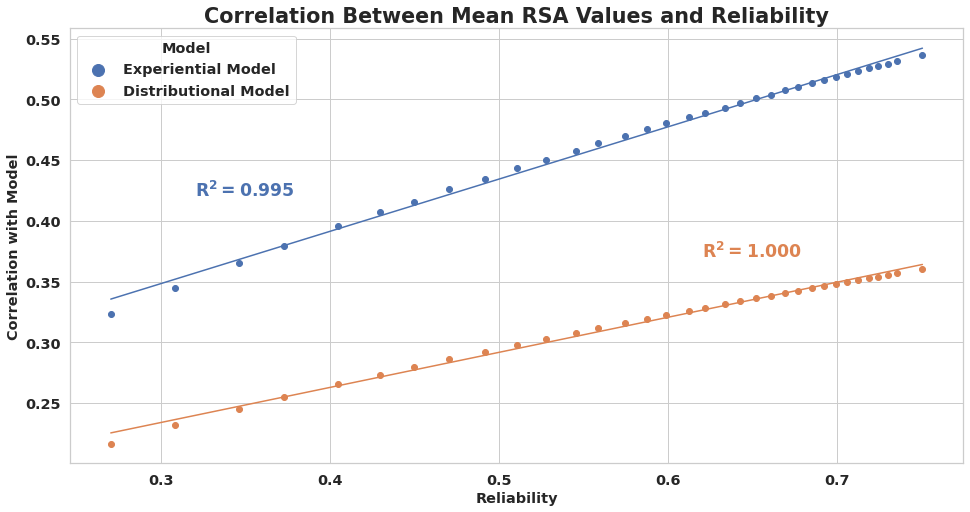

In [9]:
'''
### Figure 4 ###

The correlation between reliability and RSA correlaion
'''
tmp = df1[df1.numStim == 6].groupby('numSubj').mean()  # Select all 6 presentations
t1  = tmp.sort_values('numSubj').crona
t2  = tmp.sort_values('numSubj').corrCREA
t3  = tmp.sort_values('numSubj').corrW2V
a1, b1 = np.polyfit(t1, t2, 1); R1 = np.corrcoef(t2,a1*t1+b1)
a2, b2 = np.polyfit(t1, t3, 1); R2 = np.corrcoef(t3,a2*t2+b2)

plt.plot(t1,a1*t1+b1)
plt.plot(t1,a2*t1+b2)
plt.scatter(t1,t2, label='Experiential Model')
plt.scatter(t1,t3, label='Distributional Model')
plt.xlabel('Reliability'); plt.ylabel('Correlation with Model')
plt.legend(title='Model')
plt.annotate(f'$R^2 = {R1[0,1]**2:.3f}$',[.32,.42],fontsize='x-large',color=palette[0])
plt.annotate(f'$R^2 = {R2[0,1]**2:.3f}$',[.62,.37],fontsize='x-large',color=palette[1])
plt.title('Correlation Between Mean RSA Values and Reliability')
#plt.savefig('corr_and_reliability.png',dpi=300,bbox_inches='tight')

Text(0, 0.28, 'Expected Asymptotic Value')

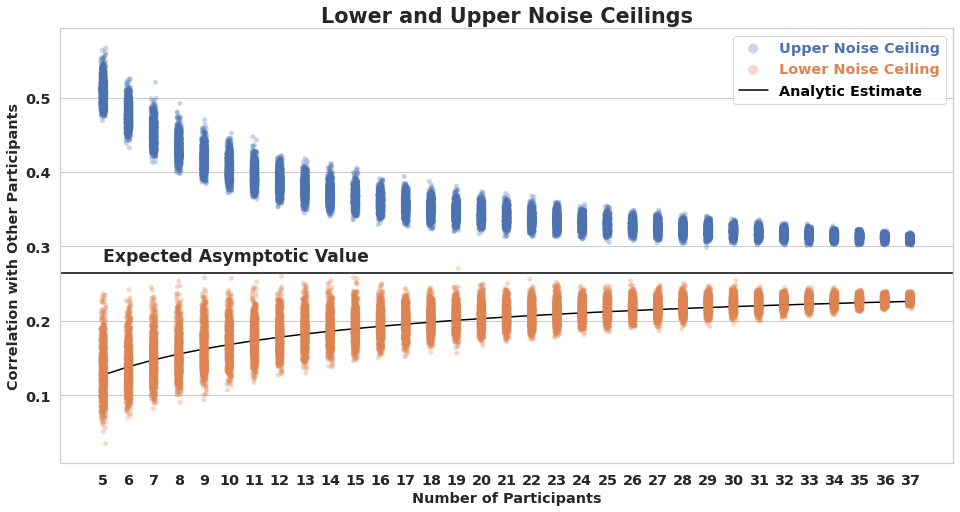

In [10]:
'''
### Figure 5 ###

The noise ceiling estimates
'''
def EstimateLN(subjRDMs):
    N = subjRDMs.shape[0]      # Total number of subjects
    A = subjRDMs.var(1).mean() # Mean of variance
    D = subjRDMs.mean(0).var() # Variance of mean
    B = (A-(N*D))/(1-N)     # Estimated Signal Variance
    C = (A-D)/(1-(1/N))     # Estimated Noise Variance
    ln = []                 # Initialize array to save output
    for i, n in enumerate(np.arange(5,38)):
        sigmaY = np.sqrt(B + ((1/(n-1))*C))
        ln.append( B / (np.sqrt(A)*sigmaY) )
    asymptote = B / (np.sqrt(A)*np.sqrt(B))
    return ln, asymptote
rdms_both = rdms.pivot(index='Subj',columns='variable')
eln, asymptote = EstimateLN(rdms_both)

sns.stripplot(x='nSubjs',y='un', data=df5,color=palette[0], dodge=True, alpha=.3)
sns.stripplot(x='nSubjs',y='ln', data=df5,color=palette[1], dodge=True, alpha=.3)
sns.lineplot(x=np.arange(33),y=eln, color='black')
plt.legend([plt.gca().collections[0],plt.gca().collections[-2],plt.gca().lines[-1]], 
           ['Upper Noise Ceiling','Lower Noise Ceiling','Analytic Estimate'],labelcolor=palette[:2]+['black']) 
plt.axhline(asymptote, color='black')
plt.title('Lower and Upper Noise Ceilings'); plt.xlabel('Number of Participants')
plt.ylabel('Correlation with Other Participants'); 
plt.annotate('Expected Asymptotic Value',[0,.28],fontsize='x-large')
#plt.savefig('noiseCeilingBox.png',bbox_inches='tight',dpi=300)

Text(0.5, 1.0, 'Days Between Scanning Sessions')

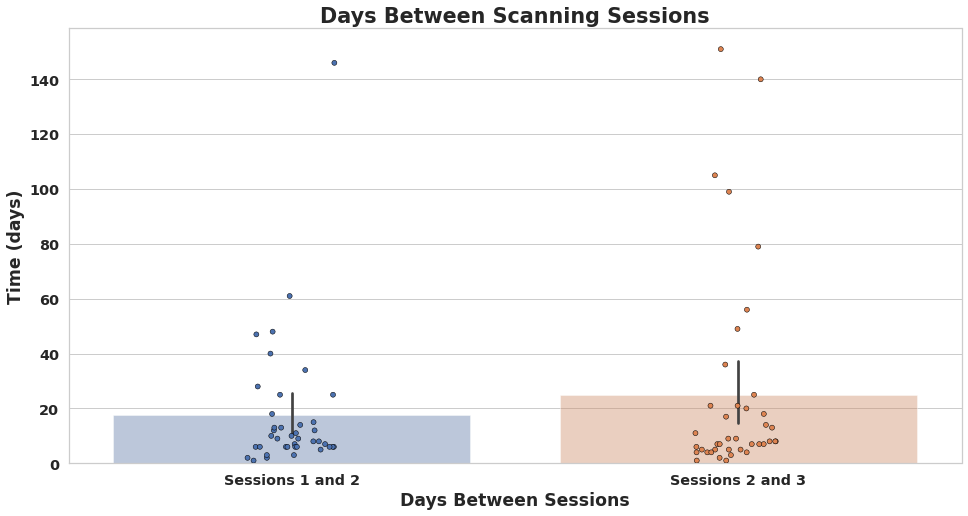

In [11]:
'''
### Supplemental Fig ###

This plots a supplemental figure showing the timing difference between
the sessions
'''
# Look at timing between sess1 and sess2 and sess3
tmp = df3.pivot(index='subj',columns='ses',values='time')
tmp = pd.DataFrame({'t12':(tmp[2]), 't23':(tmp[3]-tmp[2])}).reset_index()
tmp = tmp.melt(id_vars='subj',value_vars=['t12','t23'])
sns.barplot(x='variable',y='value',data=tmp, alpha=.4)
sns.stripplot(x='variable',y='value',data=tmp,dodge=True,edgecolor='black',linewidth=.5)
plt.xticks([0,1],labels=['Sessions 1 and 2', 'Sessions 2 and 3'])
plt.xlabel('Days Between Sessions',fontsize='x-large'); plt.ylabel('Time (days)',fontsize='x-large')
plt.title('Days Between Scanning Sessions', fontsize='xx-large')
#plt.savefig('daysBetweenSession.png',dpi=300,bbox_inches='tight')

Text(0.5, 1.0, 'Presentation and Reliability')

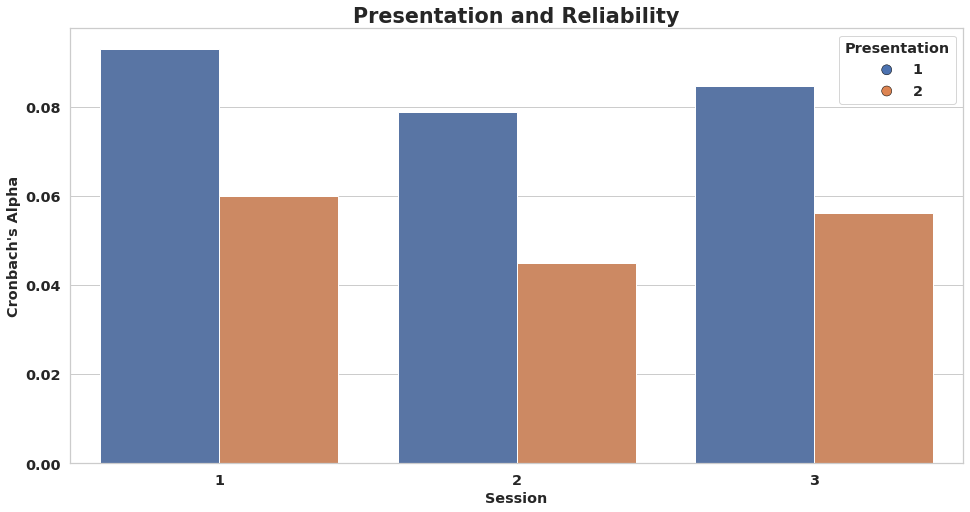

In [12]:
'''
### Supplemental Fig ###

Reliability and repeition effect
'''
tmp = df1[np.logical_and(df1.numSubj==40, df1.numStim.isin([101,102,103,104,105,106]))].copy()
tmp['session'] = [1,1,2,2,3,3]; tmp['pres'] = [1,2,1,2,1,2]
ax1 = sns.barplot(x='session',y='crona',hue='pres',data=tmp)
plt.legend(ax.collections[:-2:],['1','2'],title='Presentation')
plt.xlabel('Session'); plt.ylabel("Cronbach's Alpha")
plt.title('Presentation and Reliability')
#plt.savefig('singlePres_reliability.png',dpi=300,bbox_inches='tight')